In [1]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# Wczytanie danych
data = pd.read_csv('C:/Users/Kuba/Desktop/studia/Semestr 9/Język Python w Analizie Danych/projekt/ds_salaries.csv')
print(data)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [47]:
# Podstawowa analiza danych
print("Podstawowe informacje o danych:")
print(data.info())
print("\nOpis statystyczny danych:")
print(data.describe())
print("\nPodgląd pierwszych kilku wierszy danych:")
print(data.head())

Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None

Opis statystyczny danych:
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e

In [48]:
# Czyszczenie danych
# Sprawdzanie brakujących wartości
missing_values = data.isnull().sum()
print("\nBrakujące wartości w danych:")
print(missing_values)


Brakujące wartości w danych:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [49]:
# Usunięcie duplikatów
data = data.drop_duplicates()

In [51]:
# Analiza statystyczna
print("\nŚrednie wynagrodzenie:", data['salary_in_usd'].mean())
print("Mediana wynagrodzenia:", data['salary_in_usd'].median())
print("Odchylenie standardowe wynagrodzenia:", data['salary_in_usd'].std())


Średnie wynagrodzenie: 133409.28018575851
Mediana wynagrodzenia: 130000.0
Odchylenie standardowe wynagrodzenia: 67136.83732925013


In [52]:
# Analiza wynagrodzeń w zależności od doświadczenia
experience_salary = data.groupby('experience_level')['salary_in_usd'].mean()
print("\nŚrednie wynagrodzenie w zależności od poziomu doświadczenia:")
print(experience_salary)


Średnie wynagrodzenie w zależności od poziomu doświadczenia:
experience_level
EN     72648.685185
EX    191078.208333
MI    101828.783133
SE    153897.435650
Name: salary_in_usd, dtype: float64


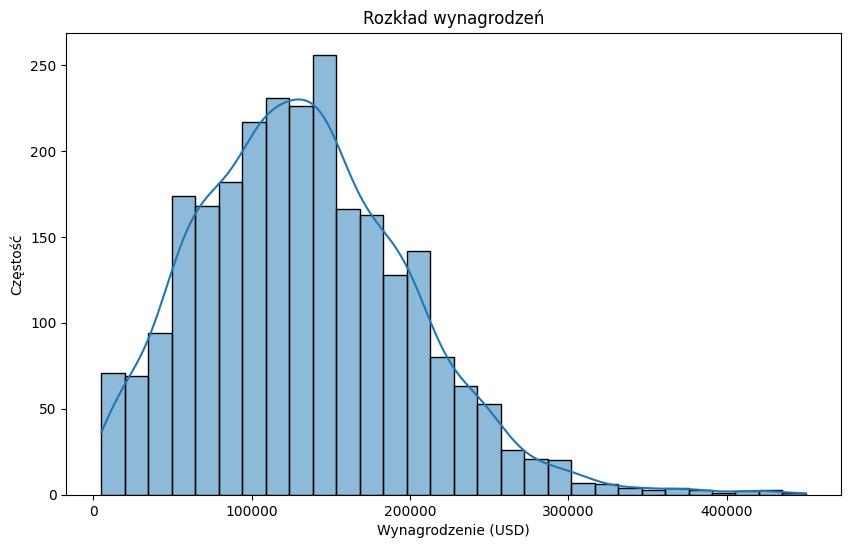

In [53]:
# Wizualizacje
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True)
plt.title('Rozkład wynagrodzeń')
plt.xlabel('Wynagrodzenie (USD)')
plt.ylabel('Częstość')
plt.show()

C:\Users\Kuba\AppData\Local\Temp\ipykernel_20300\439237133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=data, palette='Set2')


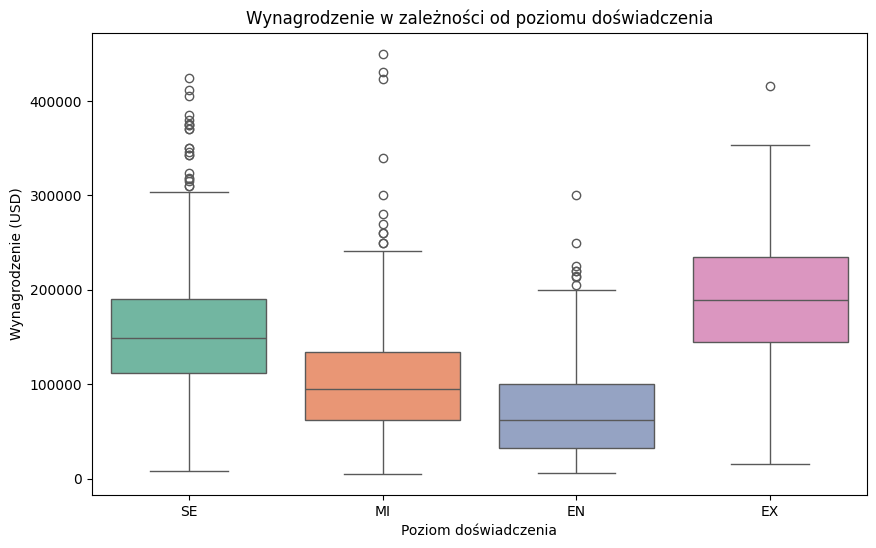

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data, palette='Set2')
plt.title('Wynagrodzenie w zależności od poziomu doświadczenia')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Wynagrodzenie (USD)')
plt.show()

In [64]:
# Analiza wynagrodzeń w różnych krajach
country_salary = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nŚrednie wynagrodzenie w zależności od kraju:")
print(country_salary)


Średnie wynagrodzenie w zależności od kraju:
company_location
IL    271446.500000
PR    167500.000000
US    152374.791602
RU    140333.333333
CA    130572.759036
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64


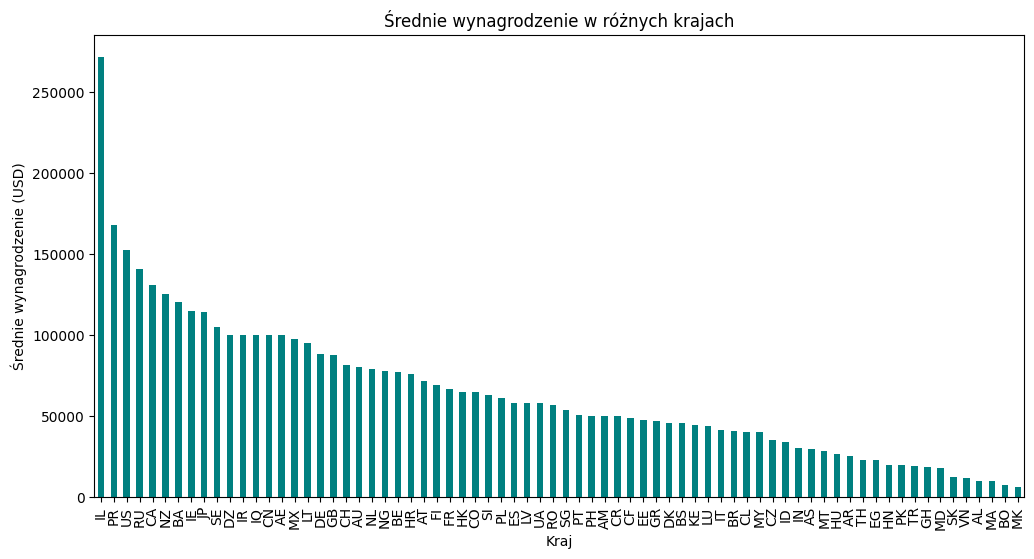

In [ ]:
# Wizualizacja wynagrodzeń w różnych krajach
plt.figure(figsize=(12, 6))
country_salary.plot(kind='bar', color='teal')
plt.title('Średnie wynagrodzenie w różnych krajach')
plt.xlabel('Kraj')
plt.ylabel('Średnie wynagrodzenie (USD)')
plt.show()

In [66]:
# Usunięcie brakujących wartości
data_cleaned = data.dropna(subset=['work_year', 'remote_ratio', 'experience_level', 'job_title', 'company_location', 'employment_type', 'salary_in_usd'])

# Przygotowanie danych do modelu regresji
categorical_features = ['experience_level', 'job_title', 'company_location', 'employment_type']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(data_cleaned[categorical_features])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Upewnienie się, że X jest utworzone z data_cleaned
X = pd.concat([data_cleaned[['work_year', 'remote_ratio']].reset_index(drop=True), categorical_encoded_df], axis=1)
y = data_cleaned['salary_in_usd'].reset_index(drop=True)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Przewidywania
y_pred = model.predict(X_test)

In [69]:
# Ocena modelu
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\nOcena modelu regresji liniowej:")
print("RMSE:", rmse)
print("R^2:", r2)


Ocena modelu regresji liniowej:
RMSE: 52689.60131381086
R^2: 0.36530670682720245


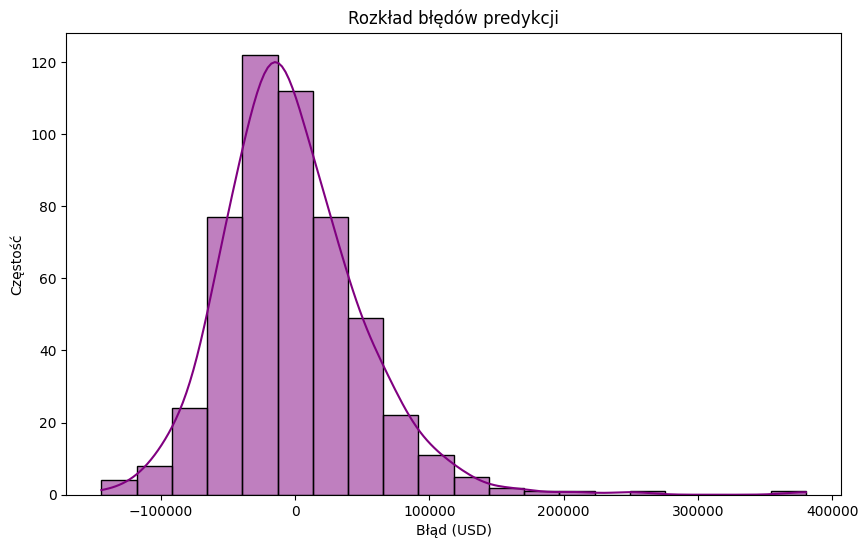

In [70]:
# Rozkład błędów predykcji
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=20, kde=True, color='purple')
plt.title('Rozkład błędów predykcji')
plt.xlabel('Błąd (USD)')
plt.ylabel('Częstość')
plt.show()

In [71]:
# Prognoza przyszłych wynagrodzeń (ARIMA)
historical_years = data[['work_year', 'salary_in_usd']].groupby('work_year').mean().reset_index()

model_arima = ARIMA(historical_years['salary_in_usd'], order=(1, 1, 1))
fit_arima = model_arima.fit()
forecast = fit_arima.forecast(steps=3)

future_years = [2024, 2025, 2026]
future_data = pd.DataFrame({'work_year': future_years, 'predicted_salary': forecast})

C:\Users\Kuba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kuba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


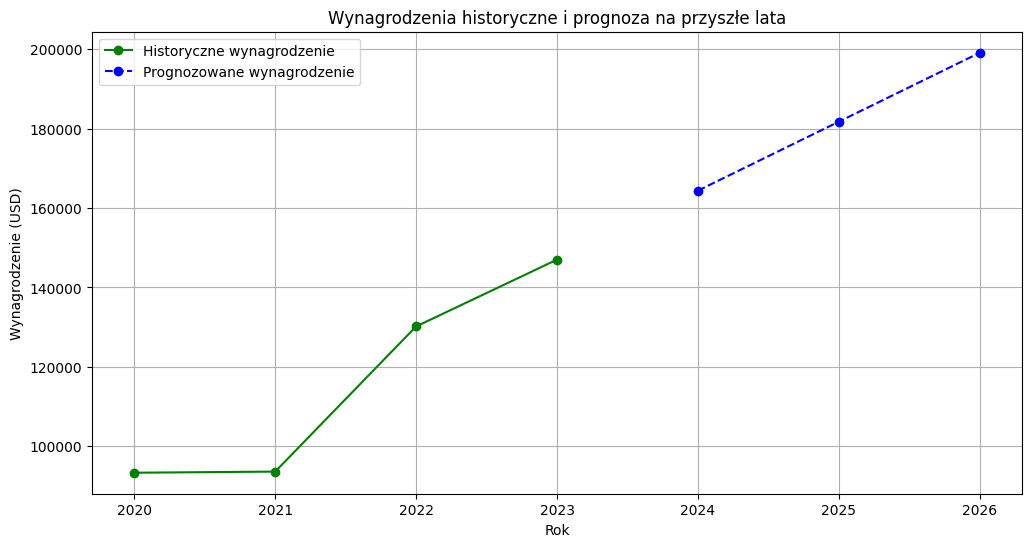

In [72]:
# Wizualizacja prognozy z uwzględnieniem lat historycznych
plt.figure(figsize=(12, 6))
plt.plot(historical_years['work_year'], historical_years['salary_in_usd'], marker='o', linestyle='-', color='green', label='Historyczne wynagrodzenie')
plt.plot(future_data['work_year'], future_data['predicted_salary'], marker='o', linestyle='--', color='blue', label='Prognozowane wynagrodzenie')
plt.title('Wynagrodzenia historyczne i prognoza na przyszłe lata')
plt.xlabel('Rok')
plt.ylabel('Wynagrodzenie (USD)')
plt.xticks(list(historical_years['work_year']) + future_years)
plt.legend()
plt.grid(True)
plt.show()